<a href="https://colab.research.google.com/github/GunduSriBhanu/SriBhanu_DATA606/blob/main/src/proposal_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Exploratory Data Analysis

## Data Loading

### Converting raw data to .csv files for analysis and merging
The datasets are in the form of raw data and hence the data is converted to the .csv files for access of data and analysis.

In [2]:
import urllib.request as urllib
import numpy as np

url_cleaveland = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
raw_data = urllib.urlopen(url_cleaveland)
with open('heart_disease_cleaveland_processed.csv', 'wb') as file:
    file.write(raw_data.read())

url_hungarian = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
raw_data = urllib.urlopen(url_hungarian)
with open('heart_disease_hungarian_processed.csv', 'wb') as file:
    file.write(raw_data.read())

url_switzerland = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
raw_data = urllib.urlopen(url_switzerland)
with open('heart_disease_switzerland_processed.csv', 'wb') as file:
    file.write(raw_data.read())




### Loading Datasets 
Columns are added to all the datasets based on the information from the webiste "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease" mentioned from the year 1984.

In [3]:
heart_labels = ['age','sex','chest_pain_type','resting blood pressure','cholestoral','fasting_blood_sugar','ekg_results','max_hr','exercise_angina','ST_depression','slope_of_st','vessels','thallium','heart_disease']
hf = pd.read_csv("heart_disease_hungarian_processed.csv", names= heart_labels)
cf = pd.read_csv("heart_disease_cleaveland_processed.csv", names= heart_labels)
sf = pd.read_csv("heart_disease_switzerland_processed.csv", names= heart_labels)

### Hungarian Data of top and bottom 5 rows
Top 5 rows

In [4]:
hf.head()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Bottom 5 rows

In [5]:
hf.tail()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


### Cleaveland Data of top and bottom 5 rows

Top 5 rows

In [6]:
cf.head()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Bottom 5 rows

In [7]:
cf.tail()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Switzerland Data top and bottom 5 rows
Top 5 rows

In [8]:
sf.head()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


Bottom 5 rows

In [9]:
sf.tail()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1
122,74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


### Hungarian Data

In [10]:
#Features in the Dataset Heart Disease dataset
hf.columns

Index(['age', 'sex', 'chest_pain_type', 'resting blood pressure',
       'cholestoral', 'fasting_blood_sugar', 'ekg_results', 'max_hr',
       'exercise_angina', 'ST_depression', 'slope_of_st', 'vessels',
       'thallium', 'heart_disease'],
      dtype='object')

In [11]:
#Shape of the dataset
hf.shape

(294, 14)

In [12]:
#info of data types
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     294 non-null    int64  
 1   sex                     294 non-null    int64  
 2   chest_pain_type         294 non-null    int64  
 3   resting blood pressure  294 non-null    object 
 4   cholestoral             294 non-null    object 
 5   fasting_blood_sugar     294 non-null    object 
 6   ekg_results             294 non-null    object 
 7   max_hr                  294 non-null    object 
 8   exercise_angina         294 non-null    object 
 9   ST_depression           294 non-null    float64
 10  slope_of_st             294 non-null    object 
 11  vessels                 294 non-null    object 
 12  thallium                294 non-null    object 
 13  heart_disease           294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

### Printing Uniques values from all the columns.

In [13]:
print("age of the Hungarian dataset:\n", hf['age'].unique())
print("\n sex of the Hungarian dataset:\n", hf['sex'].unique())
print("\n chest_pain_type of the Hungarian dataset:\n", hf['chest_pain_type'].unique())
print("\n resting blood pressure of the Hungarian dataset:\n", hf['resting blood pressure'].unique())
print("\n cholestoral of the Hungarian dataset:\n", hf['cholestoral'].unique())
print("\n fasting_blood_sugar of the Hungarian dataset:\n", hf['fasting_blood_sugar'].unique())
print("\n ekg_results of the Hungarian dataset:\n", hf['ekg_results'].unique())
print("\n max_hr of the Hungarian dataset:\n", hf['max_hr'].unique())
print("\n exercise_angina of the Hungarian dataset:\n", hf['exercise_angina'].unique())
print("\n ST_depression of the Hungarian dataset:\n", hf['ST_depression'].unique())
print("\n slope_of_st of the Hungarian dataset:\n", hf['slope_of_st'].unique())
print("\n vessels of the Hungarian dataset:\n", hf['vessels'].unique())
print("\n heart_disease of the Hungarian dataset:\n", hf['heart_disease'].unique())
print("\n thallium of the Hungarian dataset:\n", hf['thallium'].unique())


age of the Hungarian dataset:
 [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66]

 sex of the Hungarian dataset:
 [1 0]

 chest_pain_type of the Hungarian dataset:
 [2 1 3 4]

 resting blood pressure of the Hungarian dataset:
 ['130' '120' '140' '170' '100' '105' '110' '125' '150' '98' '112' '145'
 '190' '160' '115' '142' '180' '132' '135' '?' '108' '124' '113' '122'
 '92' '118' '106' '200' '138' '136' '128' '155']

 cholestoral of the Hungarian dataset:
 ['132' '243' '?' '237' '219' '198' '225' '254' '298' '161' '214' '220'
 '160' '167' '308' '264' '166' '340' '209' '260' '211' '173' '283' '194'
 '223' '315' '275' '297' '292' '182' '200' '204' '241' '339' '147' '273'
 '307' '289' '215' '281' '250' '184' '245' '291' '295' '269' '196' '268'
 '228' '358' '201' '249' '266' '186' '207' '218' '412' '224' '238' '230'
 '163' '240' '280' '257' '263' '276' '284' '195' '227' '253' '187' '202'
 '328' '168' '216' '129' '190' '188' 

### Switzerland Data

In [14]:
sf.columns

Index(['age', 'sex', 'chest_pain_type', 'resting blood pressure',
       'cholestoral', 'fasting_blood_sugar', 'ekg_results', 'max_hr',
       'exercise_angina', 'ST_depression', 'slope_of_st', 'vessels',
       'thallium', 'heart_disease'],
      dtype='object')

In [15]:
sf.shape

(123, 14)

In [16]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     123 non-null    int64 
 1   sex                     123 non-null    int64 
 2   chest_pain_type         123 non-null    int64 
 3   resting blood pressure  123 non-null    object
 4   cholestoral             123 non-null    int64 
 5   fasting_blood_sugar     123 non-null    object
 6   ekg_results             123 non-null    object
 7   max_hr                  123 non-null    object
 8   exercise_angina         123 non-null    object
 9   ST_depression           123 non-null    object
 10  slope_of_st             123 non-null    object
 11  vessels                 123 non-null    object
 12  thallium                123 non-null    object
 13  heart_disease           123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [17]:
print("age of the Switzerland dataset:\n", sf['age'].unique())
print("\n sex of the Switzerland dataset:\n", sf['sex'].unique())
print("\n chest_pain_type of the Switzerland dataset:\n", sf['chest_pain_type'].unique())
print("\n resting blood pressure of the Switzerland dataset:\n", sf['resting blood pressure'].unique())
print("\n cholestoral of the Switzerland dataset:\n", sf['cholestoral'].unique())
print("\n fasting_blood_sugar of the Switzerland dataset:\n", sf['fasting_blood_sugar'].unique())
print("\n ekg_results of the Switzerland dataset:\n", sf['ekg_results'].unique())
print("\n max_hr of the Switzerland dataset:\n", sf['max_hr'].unique())
print("\n exercise_angina of the Switzerland dataset:\n", sf['exercise_angina'].unique())
print("\n ST_depression of the Switzerland dataset:\n", sf['ST_depression'].unique())
print("\n slope_of_st of the Switzerland dataset:\n", sf['slope_of_st'].unique())
print("\n vessels of the Switzerland dataset:\n", sf['vessels'].unique())
print("\n heart_disease of the Switzerland dataset:\n", sf['heart_disease'].unique())
print("\n thallium of the Switzerland dataset:\n", sf['thallium'].unique())

age of the Switzerland dataset:
 [32 34 35 36 38 40 41 42 43 45 46 47 48 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 72 73 74]

 sex of the Switzerland dataset:
 [1 0]

 chest_pain_type of the Switzerland dataset:
 [1 4 3 2]

 resting blood pressure of the Switzerland dataset:
 ['95' '115' '?' '110' '105' '100' '135' '150' '125' '145' '140' '155'
 '160' '120' '130' '165' '80' '180' '170' '200' '185']

 cholestoral of the Switzerland dataset:
 [0]

 fasting_blood_sugar of the Switzerland dataset:
 ['?' '0' '1']

 ekg_results of the Switzerland dataset:
 ['0' '?' '1' '2']

 max_hr of the Switzerland dataset:
 ['127' '154' '130' '125' '166' '156' '179' '128' '150' '120' '144' '176'
 '99' '122' '145' '140' '138' '133' '113' '118' '149' '124' '110' '139'
 '92' '104' '170' '163' '60' '126' '82' '95' '115' '135' '141' '155' '83'
 '97' '98' '100' '148' '103' '121' '131' '182' '105' '175' '94' '119'
 '143' '63' '70' '77' '117' '123' '134' '72' '78' '109' '86' '114' '93'
 '67

### Cleaveland Data

In [18]:
cf.columns

Index(['age', 'sex', 'chest_pain_type', 'resting blood pressure',
       'cholestoral', 'fasting_blood_sugar', 'ekg_results', 'max_hr',
       'exercise_angina', 'ST_depression', 'slope_of_st', 'vessels',
       'thallium', 'heart_disease'],
      dtype='object')

In [19]:
cf.shape

(303, 14)

In [20]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    float64
 1   sex                     303 non-null    float64
 2   chest_pain_type         303 non-null    float64
 3   resting blood pressure  303 non-null    float64
 4   cholestoral             303 non-null    float64
 5   fasting_blood_sugar     303 non-null    float64
 6   ekg_results             303 non-null    float64
 7   max_hr                  303 non-null    float64
 8   exercise_angina         303 non-null    float64
 9   ST_depression           303 non-null    float64
 10  slope_of_st             303 non-null    float64
 11  vessels                 303 non-null    object 
 12  thallium                303 non-null    object 
 13  heart_disease           303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory

In [21]:
print("age of the Cleaveland dataset:\n", cf['age'].unique())
print("\n sex of the Cleaveland dataset:\n", cf['sex'].unique())
print("\n chest_pain_type of the Cleaveland dataset:\n", cf['chest_pain_type'].unique())
print("\n resting blood pressure of the Cleaveland dataset:\n", cf['resting blood pressure'].unique())
print("\n cholestoral of the Cleaveland dataset:\n", cf['cholestoral'].unique())
print("\n fasting_blood_sugar of the Cleaveland dataset:\n", cf['fasting_blood_sugar'].unique())
print("\n ekg_results of the Cleaveland dataset:\n", cf['ekg_results'].unique())
print("\n max_hr of the Cleaveland dataset:\n", cf['max_hr'].unique())
print("\n exercise_angina of the Cleaveland dataset:\n", cf['exercise_angina'].unique())
print("\n ST_depression of the Cleaveland dataset:\n", cf['ST_depression'].unique())
print("\n slope_of_st of the Cleaveland dataset:\n", cf['slope_of_st'].unique())
print("\n vessels of the Cleaveland dataset:\n", cf['vessels'].unique())
print("\n heart_disease of the Cleaveland dataset:\n", cf['heart_disease'].unique())
print("\n thallium of the Cleaveland dataset:\n", cf['thallium'].unique())

age of the Cleaveland dataset:
 [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

 sex of the Cleaveland dataset:
 [1. 0.]

 chest_pain_type of the Cleaveland dataset:
 [1. 4. 3. 2.]

 resting blood pressure of the Cleaveland dataset:
 [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

 cholestoral of the Cleaveland dataset:
 [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321

### Based on observations from all the three datasets:
1. Some datatypes are improperly assigned.
2. Some columns had special characters like '?', which needs to be removed.


#### Removal of special characters from the datasets and replacing with null values

Cleaveland data

In [22]:
cf['vessels'] = cf['vessels'].replace('?',np.nan) 
cf['thallium'] = cf['thallium'].replace('?',np.nan) 

In [23]:
cf.isna().sum()

age                       0
sex                       0
chest_pain_type           0
resting blood pressure    0
cholestoral               0
fasting_blood_sugar       0
ekg_results               0
max_hr                    0
exercise_angina           0
ST_depression             0
slope_of_st               0
vessels                   4
thallium                  2
heart_disease             0
dtype: int64

Hungarian data

In [24]:
hf['fasting_blood_sugar'] = hf['fasting_blood_sugar'].replace('?',np.nan) 
hf['ekg_results'] = hf['ekg_results'].replace('?',np.nan) 
hf['exercise_angina'] = hf['exercise_angina'].replace('?',np.nan) 
hf['slope_of_st'] = hf['slope_of_st'].replace('?',np.nan) 
hf['vessels'] = hf['vessels'].replace('?',np.nan) 
hf['thallium'] = hf['thallium'].replace('?',np.nan) 
hf['resting blood pressure'] = hf['resting blood pressure'].replace('?',np.nan)
hf['max_hr'] = hf['max_hr'].replace('?',np.nan) 
hf['ST_depression'] = hf['ST_depression'].replace('?',np.nan) 
hf['cholestoral'] = hf['cholestoral'].replace('?',np.nan) 

In [25]:
hf.isna().sum()

age                         0
sex                         0
chest_pain_type             0
resting blood pressure      1
cholestoral                23
fasting_blood_sugar         8
ekg_results                 1
max_hr                      1
exercise_angina             1
ST_depression               0
slope_of_st               190
vessels                   291
thallium                  266
heart_disease               0
dtype: int64

Switzerland data

In [26]:
sf['fasting_blood_sugar'] = sf['fasting_blood_sugar'].replace('?',np.nan) 
sf['ekg_results'] = sf['ekg_results'].replace('?',np.nan) 
sf['exercise_angina'] = sf['exercise_angina'].replace('?',np.nan) 
sf['slope_of_st'] = sf['slope_of_st'].replace('?',np.nan) 
sf['vessels'] = sf['vessels'].replace('?',np.nan) 
sf['thallium'] = sf['thallium'].replace('?',np.nan) 
sf['resting blood pressure'] = sf['resting blood pressure'].replace('?',np.nan)
sf['max_hr'] = sf['max_hr'].replace('?',np.nan) 
sf['ST_depression'] = sf['ST_depression'].replace('?',np.nan) 

In [27]:
sf.isna().sum()

age                         0
sex                         0
chest_pain_type             0
resting blood pressure      2
cholestoral                 0
fasting_blood_sugar        75
ekg_results                 1
max_hr                      1
exercise_angina             1
ST_depression               6
slope_of_st                17
vessels                   118
thallium                   52
heart_disease               0
dtype: int64

#### Assigning datatypes based on the analysis of categories and numerical.
From my observation, these columns must be object data types( categorical features):

**Categorical datatypes are:**

sex

chest_pain_type

ekg_results 

exercise_angina

slope_of_st

thallium

heart_disease

**Numerical datatypes are:**

age 

resting blood pressure

cholestoral

fasting_blood_sugar

max_hr

ST_depression

vessels


In [28]:
categorical_columns = ['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']
numerical_columns = ['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']

In [29]:
cf[numerical_columns] = cf[numerical_columns].apply(pd.to_numeric)
for i in categorical_columns:
  cf[i] = cf[i].astype(str)
print(cf.dtypes)

age                       float64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype: object


In [30]:
hf[numerical_columns] = hf[numerical_columns].apply(pd.to_numeric)
for j in categorical_columns:
  hf[j] = hf[j].astype(str)
print(hf.dtypes)

age                         int64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype: object


In [31]:
sf[numerical_columns] = sf[numerical_columns].apply(pd.to_numeric)
for k in categorical_columns:
  sf[k] = sf[k].astype(str)
print(sf.dtypes)

age                         int64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral                 int64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype: object


In [32]:
#unifying all datatypes in all datasets:
cf['age'] = cf['age'].astype(int)
sf['cholestoral'] = sf['cholestoral'].astype(float)
print("Cleaveland:\n",cf.dtypes)
print("\nSwitzerland:\n",sf.dtypes)
print("\nHungarian: \n",hf.dtypes)

Cleaveland:
 age                         int64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype: object

Switzerland:
 age                         int64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
dtype:

### Combine across rows and columns

In [33]:
df_concat = pd.concat([cf,sf,hf],ignore_index = True)
df_concat.shape

(720, 14)

In [34]:
df_concat.head()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [35]:
df_concat.tail()

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
715,52,1,4,160.0,331.0,0,0,94.0,1,2.5,nan,NaN,nan,1
716,54,0,3,130.0,294.0,0,1,100.0,1,0.0,2,NaN,nan,1
717,56,1,4,155.0,342.0,1,0,150.0,1,3.0,2,NaN,nan,1
718,58,0,2,180.0,393.0,0,0,110.0,1,1.0,2,NaN,7,1
719,65,1,4,130.0,275.0,0,1,115.0,1,1.0,2,NaN,nan,1


### Hard coding some object columns for visualization and analysis

In [36]:
# 'sex','chest_pain_type','ekg_results','exercise_angina','slope_of_st','thallium','heart_disease','vessels'
df_concat['sex'] = df_concat['sex'].replace({'0':'Female', '1':'Male','0.0':'Female', '1.0':'Male'})
df_concat['chest_pain_type'] = df_concat['chest_pain_type'].replace({'1':'Typical_Angina','2':'Atypical_Angina','3':'Non_Anginal','4':'Asymptomatic_Bp','1.0':'Typical_Angina','2.0':'Atypical_Angina','3.0':'Non_Anginal','4.0':'Asymptomatic_Bp'})
df_concat['exercise_angina'] = df_concat['exercise_angina'].replace({'0':'Yes', '1':'No', '0.0':'Yes', '1.0':'No'})
df_concat['fasting_blood_sugar'] = df_concat['fasting_blood_sugar'].replace({'0':'Present', '1':'Absent', '0.0':'Present', '1.0':'Absent'})
df_concat['ekg_results'] = df_concat['ekg_results'].replace({'0.0':'Normal', '1.0' : 'Abnormal', '2.0':'Probable','0':'Normal', '1' : 'Abnormal', '2':'Probable'})
df_concat['slope_of_st'] = df_concat['slope_of_st'].replace({'1.0' : 'Upsloping', '2.0' :'Flat', '3.0' : 'Downsloping','1' : 'Upsloping', '2' :'Flat', '3' : 'Downsloping'})
df_concat['thallium'] = df_concat['thallium'].replace({'3.0':'Normal','6.0' :'Fixed_Defect', '7.0' : 'Reversable_Defect','3':'Normal','6' :'Fixed_Defect', '7' : 'Reversable_Defect'})
df_concat['heart_disease'] = df_concat['heart_disease'].replace({'0':'Absence', '1' : 'Presence', '2' : 'Presence', '3' : 'Presence', '4' : 'Presence'})
df_concat.sample(10)

,age,sex,chest_pain_type,resting blood pressure,cholestoral,fasting_blood_sugar,ekg_results,max_hr,exercise_angina,ST_depression,slope_of_st,vessels,thallium,heart_disease
607,59,Male,Non_Anginal,180.0,213.0,Present,Normal,100.0,Yes,0.0,nan,NaN,nan,Absence
468,40,Male,Non_Anginal,130.0,215.0,Present,Normal,138.0,Yes,0.0,nan,NaN,nan,Absence
433,32,Male,Atypical_Angina,125.0,254.0,Present,Normal,155.0,Yes,0.0,nan,NaN,nan,Absence
646,58,Male,Non_Anginal,130.0,213.0,Present,Abnormal,140.0,Yes,0.0,nan,NaN,Fixed_Defect,Presence
696,55,Male,Asymptomatic_Bp,145.0,248.0,Present,Normal,96.0,No,2.0,Flat,NaN,nan,Presence
316,42,Male,Asymptomatic_Bp,145.0,0.0,Present,Normal,99.0,No,0.0,Flat,NaN,nan,Presence
159,68,Male,Non_Anginal,118.0,277.0,Present,Normal,151.0,Yes,1.0,Upsloping,1.0,Reversable_Defect,Absence
643,54,Male,Asymptomatic_Bp,125.0,224.0,Present,Normal,122.0,Yes,2.0,Flat,NaN,nan,Presence
657,46,Male,Asymptomatic_Bp,120.0,231.0,Present,Normal,115.0,No,0.0,nan,NaN,nan,Presence
303,32,Male,Typical_Angina,95.0,0.0,nan,Normal,127.0,Yes,0.7,Upsloping,NaN,nan,Presence


In [37]:
print("age of the Heart Failure dataset:\n", df_concat['age'].unique())
print("\n sex of the Heart Failure dataset:\n", df_concat['sex'].unique())
print("\n chest_pain_type of the Heart Failure dataset:\n", df_concat['chest_pain_type'].unique())
print("\n resting blood pressure of the Heart Failure dataset:\n", df_concat['resting blood pressure'].unique())
print("\n cholestoral of the Heart Failure dataset:\n", df_concat['cholestoral'].unique())
print("\n fasting_blood_sugar of the Heart Failure dataset:\n", df_concat['fasting_blood_sugar'].unique())
print("\n ekg_results of the Heart Failure dataset:\n", df_concat['ekg_results'].unique())
print("\n max_hr of the Heart Failure dataset:\n", df_concat['max_hr'].unique())
print("\n exercise_angina of the Heart Failure dataset:\n", df_concat['exercise_angina'].unique())
print("\n ST_depression of the Heart Failure dataset:\n", df_concat['ST_depression'].unique())
print("\n slope_of_st of the Heart Failure dataset:\n", df_concat['slope_of_st'].unique())
print("\n vessels of the Heart Failure dataset:\n", df_concat['vessels'].unique())
print("\n heart_disease of the Heart Failure dataset:\n", df_concat['heart_disease'].unique())
print("\n thallium of the Heart Failure dataset:\n", df_concat['thallium'].unique())

age of the Heart Failure dataset:
 [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 32 36 72 73 28 30 31
 33]

 sex of the Heart Failure dataset:
 ['Male' 'Female']

 chest_pain_type of the Heart Failure dataset:
 ['Typical_Angina' 'Asymptomatic_Bp' 'Non_Anginal' 'Atypical_Angina']

 resting blood pressure of the Heart Failure dataset:
 [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  95.  nan  80. 185.  98. 190.
 113.  92.]

 cholestoral of the Heart Failure dataset:
 [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 

### Summary of statistics

In [38]:
df_concat.describe()

,age,resting blood pressure,cholestoral,max_hr,ST_depression,vessels
count,720.000000,717.000000,697.000000,718.000000,714.000000,307.000000
mean,51.888889,131.804742,204.774749,140.565460,0.789636,0.680782
std,9.193720,18.529331,109.275156,25.647172,1.066961,0.937101
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,45.000000,120.000000,182.000000,122.000000,0.000000,0.000000
50%,53.000000,130.000000,227.000000,142.000000,0.200000,0.000000
75%,58.000000,140.000000,270.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


### Checking Outliers

In [39]:
numerical_columns = list(df_concat.loc[:,['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']])
categorical_columns = list(df_concat.loc[:,['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']])

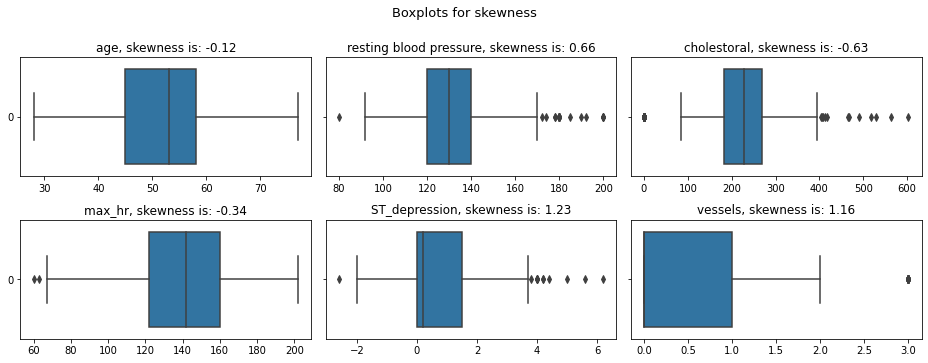

In [40]:
import plotly.express as px
from matplotlib import pyplot as plt
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=13)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_concat, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for skewness')
plt.tight_layout()


From the data, ST_depression and vessels are highly skewed.

In [41]:
df_concat.corr()

,age,resting blood pressure,cholestoral,max_hr,ST_depression,vessels
age,1.000000,0.252331,-0.089690,-0.334190,0.223899,0.372712
resting blood pressure,0.252331,1.000000,0.078219,-0.116202,0.166548,0.095599
cholestoral,-0.089690,0.078219,1.000000,0.265694,0.085287,0.038337
max_hr,-0.334190,-0.116202,0.265694,1.000000,-0.157288,-0.270254
ST_depression,0.223899,0.166548,0.085287,-0.157288,1.000000,0.284315
vessels,0.372712,0.095599,0.038337,-0.270254,0.284315,1.000000


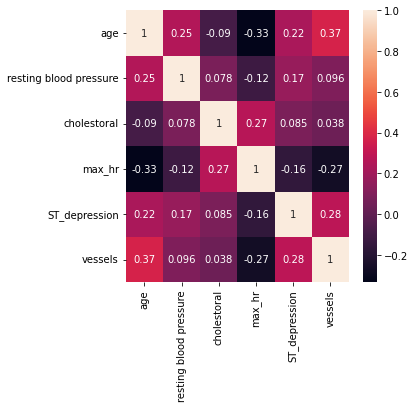

In [42]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.heatmap(df_concat.corr(),annot=True)
plt.show()

### Note:
Missing values imputation is done in Feature processing

## Data Visualization